In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [2]:
# Load the dataset
data = pd.read_csv('../data/ecommerce_data.csv')

In [3]:
data.head()

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


In [5]:
data.tail()

,productTitle,originalPrice,price,sold,tagText
1995,Modern TV Stand Entertainment Center with Two ...,NaN,$72.49,8,Free shipping
1996,"Large Wardrobe Armoire Closet with 3 Doors, Fr...",NaN,$276.65,2,Free shipping
1997,"Velvet Futon Sofa Bed, 73-inch Sleeper Couch w...",NaN,$196.44,10,Free shipping
1998,Furniture Acrylic Coffee Table Transparent Liv...,NaN,$228.18,0,Free shipping
1999,Bed Frane Bamboo and Metal Platform Bed Frame ...,NaN,$99.48,0,Free shipping


In [6]:
data.shape

(2000, 5)

In [7]:
# check columns and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   productTitle   2000 non-null   object
 1   originalPrice  487 non-null    object
 2   price          2000 non-null   object
 3   sold           2000 non-null   int64 
 4   tagText        1997 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.3+ KB


In [8]:
data.describe()

,sold
count,2000.000000
mean,23.493500
std,254.094061
min,0.000000
25%,1.000000
50%,3.000000
75%,9.000000
max,10000.000000


In [9]:
data.dtypes

productTitle     object
originalPrice    object
price            object
sold              int64
tagText          object
dtype: object

In [10]:
# check nullvalues
data.isnull().sum()

productTitle        0
originalPrice    1513
price               0
sold                0
tagText             3
dtype: int64

In [11]:
data['price'] = data['price'].str.replace(r'[$,]', '', regex=True)
data['originalPrice'] = data['originalPrice'].str.replace(r'[$,]', '', regex=True)

In [12]:
data.head()

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,78.4,39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,48.82,21.37,1,Free shipping


In [13]:
# rplace NaN with zeroes without fillna method
data['price'] = data['price'].replace('NaN', 0).astype(float).mean()
data['originalPrice'] = data['originalPrice'].replace('NaN', 0).astype(float).mean()
data['sold'] = data['sold'].mean().astype(int)
data['tagText'] = data['tagText'].mode()[0]

In [14]:
data.dtypes

productTitle      object
originalPrice    float64
price            float64
sold               int64
tagText           object
dtype: object

In [15]:
data.isnull().sum()

productTitle     0
originalPrice    0
price            0
sold             0
tagText          0
dtype: int64

In [16]:
data.dtypes

productTitle      object
originalPrice    float64
price            float64
sold               int64
tagText           object
dtype: object

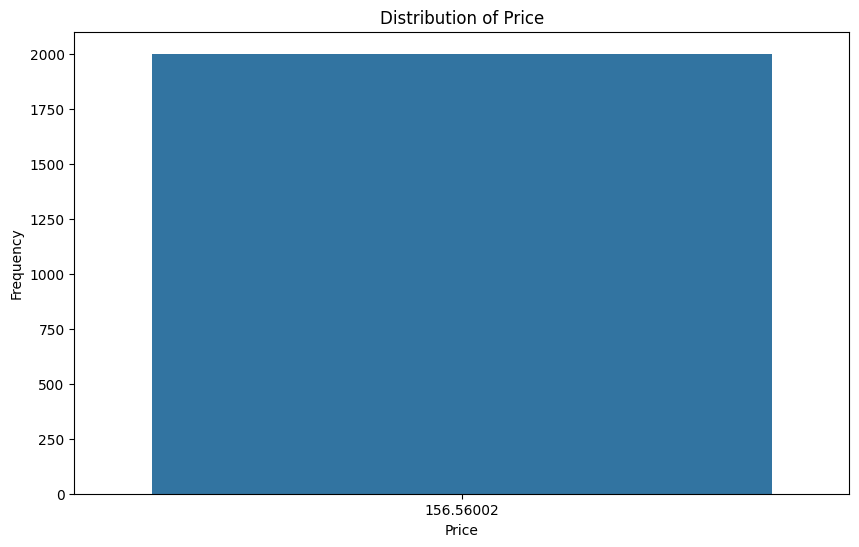

In [17]:
# Univariate Analysis: Distribution of Price
plt.figure(figsize=(10, 6))
sns.countplot(x='price', data=data)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

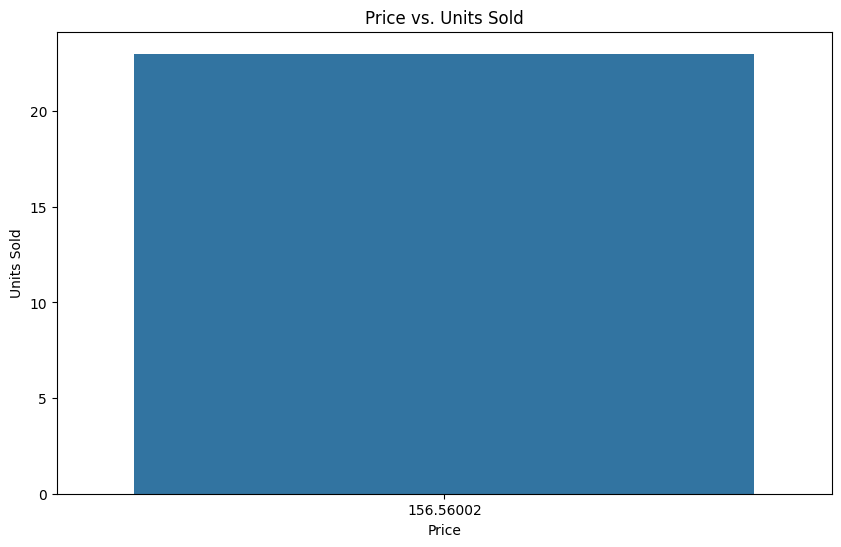

In [18]:
# Bivariate Analysis: Price vs. Units Sold without scatter, boxplot
plt.figure(figsize=(10, 6))
sns.barplot(x='price', y='sold', data=data)
plt.title('Price vs. Units Sold')
plt.xlabel('Price')
plt.ylabel('Units Sold')
plt.show()

Text(0, 0.5, 'Units Sold')

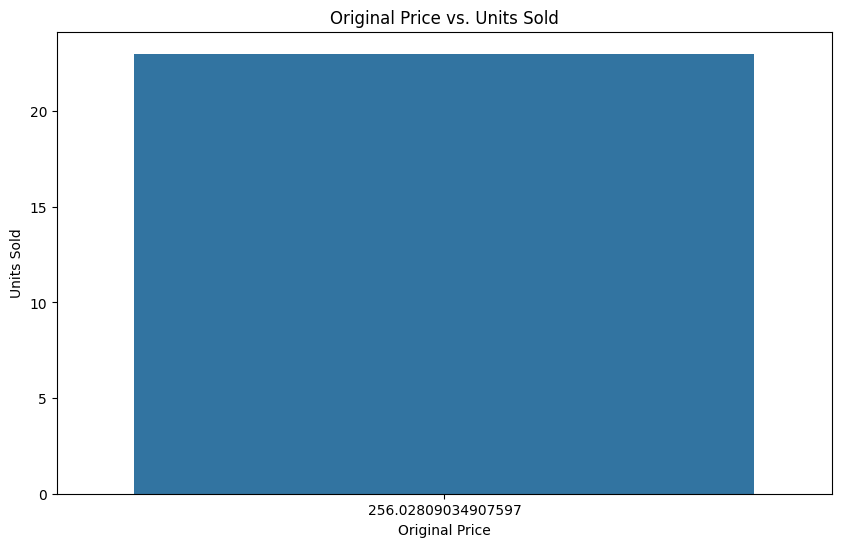

In [19]:
# Bivariate Analysis: Original Price vs. Units Sold
plt.figure(figsize=(10, 6))
sns.barplot(x='originalPrice', y='sold', data=data)
plt.title('Original Price vs. Units Sold')
plt.xlabel('Original Price')
plt.ylabel('Units Sold')

In [20]:
X = data[['price', 'originalPrice']]
y = data['sold']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Linear Regression Model Training

In [22]:
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


In [ ]:
#Model Prediction

In [23]:
y_pred = model.predict(X_test)

print("Predictions made on the test set.")

Predictions made on the test set.


In [ ]:
#Model Evaluation

In [24]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")
print(f"Accuracy: {accuracy * 100:.2f}%")

Mean Squared Error (MSE): 0.00
R-squared (R2) Score: 1.00
Accuracy: 100.00%


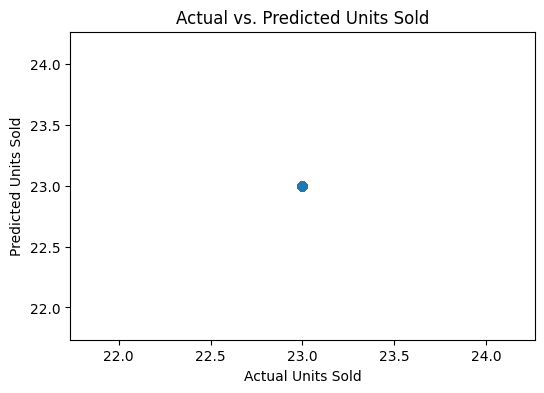

In [25]:
# display actual vs predicted
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual Units Sold')
plt.ylabel('Predicted Units Sold')
plt.title('Actual vs. Predicted Units Sold')
plt.show()